Loading the database

In [ ]:
!pip install sentence-transformers

In [2]:
# Importing libraries
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [3]:
# connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading the database
url = "/content/drive/MyDrive/Analysis_Classification_dataset - Sheet1.csv"
df = pd.read_csv(url)

In [5]:
def get_bert_embedding(data_frame):
  """
  Input a data frame and return the bert embedding vectors for the each sentence column.
  Return 2 matrices each of shape (#_samples, #size_of_word_emb).
  """
  cont_model = SentenceTransformer('distilbert-base-uncased')
  
  feature1 = cont_model.encode(data_frame)
  
  return feature1

for i in df.index:
  if df["LABEL"][i] == "COUNT":
    df["LABEL"][i] = 0
  if df["LABEL"][i] == "PROBABILITY":
    df["LABEL"][i] = 1
  if df["LABEL"][i] == "CORRELATION":
    df["LABEL"][i] = 2

df = df.sample(frac = 1)

In [6]:
df_train = df.iloc[:(len(df.index) *80) // 100, :]
df_test = df.iloc[len(df_train.index):, :]
X_train = df_train["QUERY"]
y_train = df_train["LABEL"]
X_test = df_test["QUERY"]
y_test = df_test["LABEL"]

In [7]:
def acc(y_true, y_pred):
  count = 0
  correct = 0
  for i in range(len(y_true)):
    if y_true[i] == y_pred[i]:
      correct += 1
    count += 1
  return correct / count

In [8]:
embedding_train = get_bert_embedding(np.array(X_train))
embedding_test = get_bert_embedding(np.array(X_test))

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias

Accuracy plot for logistic regression

In [9]:
clf = SGDClassifier(loss = "log_loss", penalty = None)

In [10]:
train_accuracies = []
accuracies = []
index = []
i = 0
epochs = 50
for i in range(epochs):
  clf.partial_fit(embedding_train, y_train, [0, 1, 2])
  predictions = clf.predict(embedding_test)
  train_predictions = clf.predict(embedding_train)
  # print(predictions)
  accuracies.append(accuracy_score(np.array(y_test, dtype = "int"), np.array(predictions, dtype = "int")))
  train_accuracies.append(accuracy_score(np.array(y_train, dtype = "int"), np.array(train_predictions, dtype = "int")))
  index.append(i)
  i += 1


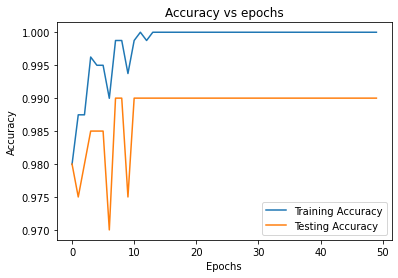

In [11]:
plt.plot(index, train_accuracies, label = "Training Accuracy")
plt.plot(index, accuracies, label = "Testing Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs epochs")
plt.legend()

Logistic with L2 regularization

In [12]:
clf = SGDClassifier(loss = "log_loss")

In [13]:
train_accuracies = []
accuracies = []
index = []
i = 0
epochs = 50
for i in range(epochs):
  clf.partial_fit(embedding_train, y_train, [0, 1, 2])
  predictions = clf.predict(embedding_test)
  train_predictions = clf.predict(embedding_train)
  # print(predictions)
  accuracies.append(accuracy_score(np.array(y_test, dtype = "int"), np.array(predictions, dtype = "int")))
  train_accuracies.append(accuracy_score(np.array(y_train, dtype = "int"), np.array(train_predictions, dtype = "int")))
  index.append(i)
  i += 1

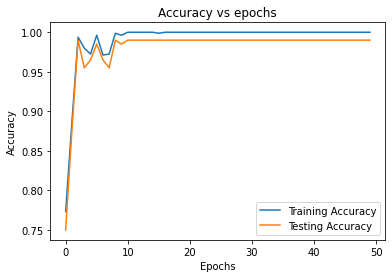

In [14]:
plt.plot(index, train_accuracies, label = "Training Accuracy")
plt.plot(index, accuracies, label = "Testing Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs epochs")
plt.legend()

Logisitic with L1

In [15]:
clf = SGDClassifier(loss = "log_loss", penalty = "l1")

In [16]:
train_accuracies = []
accuracies = []
index = []
i = 0
epochs = 50
for i in range(epochs):
  clf.partial_fit(embedding_train, y_train, [0, 1, 2])
  predictions = clf.predict(embedding_test)
  train_predictions = clf.predict(embedding_train)
  # print(predictions)
  accuracies.append(accuracy_score(np.array(y_test, dtype = "int"), np.array(predictions, dtype = "int")))
  train_accuracies.append(accuracy_score(np.array(y_train, dtype = "int"), np.array(train_predictions, dtype = "int")))
  index.append(i)
  i += 1

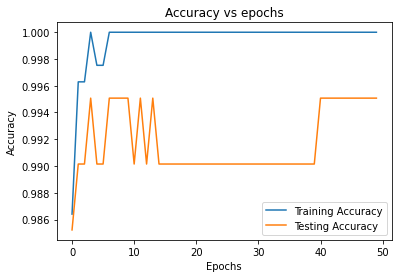

In [ ]:
plt.plot(index, train_accuracies, label = "Training Accuracy")
plt.plot(index, accuracies, label = "Testing Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs epochs")
plt.legend()